In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize,LabelBinarizer
from scipy import stats
from copy import deepcopy
from sklearn.model_selection import cross_val_score
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
test = pd.read_csv("C:\myPython\miniweb\miniwebserver\MLearn_02\docTang\\xgboost\\test.csv")
train = pd.read_csv("C:\myPython\miniweb\miniwebserver\MLearn_02\docTang\\xgboost\\train.csv")
train.shape

(188318, 132)

In [4]:
train.describe()
pd.isnull(train).values.any()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [5]:
cat = train.select_dtypes(include=['object']).columns
cat = list(cat)


In [16]:
catCount = []
for catItem in cat:
    catCount.append(len(train[catItem].unique()))

uniq_values_in_categories =pd.DataFrame({"Name":cat,"unique_values":catCount})


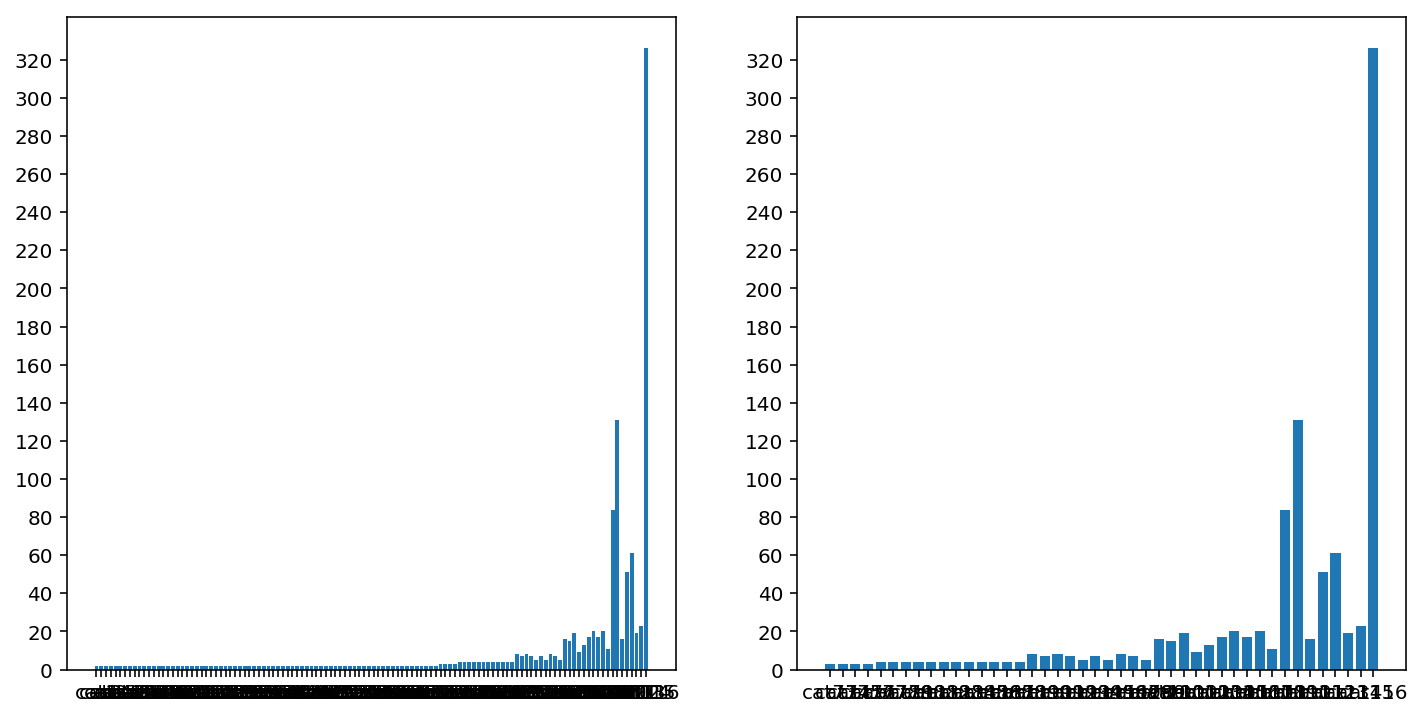

In [26]:
# uniq_values_in_categories[uniq_values_in_categories.unique_values < 30].uniq_values_in_categories
plt.figure(figsize=(18,5))
plt.subplot(121)

ind = np.arange(len(uniq_values_in_categories.Name.values))
plt.bar(ind,uniq_values_in_categories.unique_values.values)
plt.xticks(ind, uniq_values_in_categories.Name.values)
plt.yticks(np.arange(0, uniq_values_in_categories.unique_values.values.max(), 20))

plt.subplot(122)
new_values_in_categories = uniq_values_in_categories[uniq_values_in_categories.unique_values> 2]
ind = np.arange(len(new_values_in_categories.Name.values))
plt.bar(ind,new_values_in_categories.unique_values.values )
plt.xticks(ind, new_values_in_categories.Name.values np.arange(0, new_values_in_categories.unique_values.values.max(), 20))
plt.yticks(np.arange(0, new_values_in_categories.unique_values.values.max(), 20))
plt.show()
